**39\. Methodenseminar - Big Data Module II: Introduction to Social Network Science with Python**

# A tutorial on stochastic block modelling: SBM inference

**Author**: <a href='https://marcosoliveira.info/'>Marcos Oliveira</a>, GESIS - Leibniz Institute for the Social Sciences

**Version**: 29 May 2019

**Description**: This is an introduction to stochastic block modelling in Python using the <code>graph-tool</code> library. 
    
## Imports and Settings

In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np

<div class="alert alert-danger">
    You need the <code>graph_tool</code> library in your machine. Sometimes the installation is challenging. This <a href=https://git.skewed.de/count0/graph-tool/wikis/installation-instructions>page</a> might help you.
</div>

In [2]:
import graph_tool.all as gt

In [3]:
# a helper for colors
def node_colors(g, group_memberships):
    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']
    to_rgb = lambda h: list(int(h[i:i+2], 16)/255. for i in (0, 2, 4))
    vertex_color = g.new_vertex_property('vector<double>')
    for m, v in zip(group_memberships, g.vertices()):
        vertex_color[g.vertex(v)] = tuple(to_rgb(colors[m%len(colors)][1:]) + [255.0])
    return vertex_color

# blockmodel generator
def generate_assortative_block_mix(group_sizes, p_ii, p_ij):
    groups = len(group_sizes)
    membership = np.concatenate([
        np.repeat(i, g) for (i, g) in zip(range(groups), group_sizes)
    ])
    propensity = np.zeros([groups, groups])
    for i in range(groups):
        for j in range(groups):
            if i == j:
                propensity[i, j] = p_ii * group_sizes[i] * group_sizes[j] 
            else:
                propensity[i, j] = p_ij * group_sizes[i] * group_sizes[j] / 2.    
    return membership, propensity

# a helper to reset the rng
def reset_rng():
    np.random.seed(42)
    gt.seed_rng(42)
    
def block_assignment(membership):
    b = np.zeros(len(np.concatenate(list(membership.values()))), dtype=int)
    for b_ in membership:
        b[membership[b_]] = b_
    return b

# Exercises

For the exercises, we will use data from the Twitter.

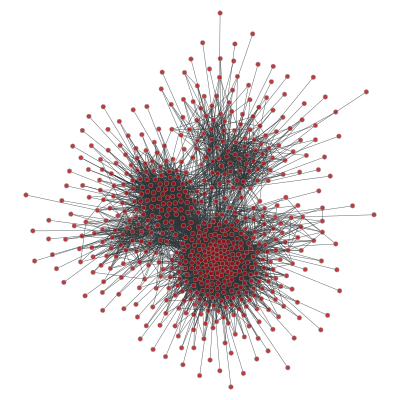

In [4]:
import pandas as pd
users_data = pd.read_csv('../data/btw13/users.txt', header='infer', delimiter='\t', encoding='utf-8', index_col="user_id")
retweet_data = pd.read_csv('../data/btw13/retweet.txt', header='infer', delimiter='\t', encoding='utf-8', index_col="transaction_id")
network = gt.Graph(directed=False)
for i in users_data.index:
    network.add_vertex(i)
network.add_edge_list(retweet_data.values)
network = gt.GraphView(network, vfilt=gt.label_largest_component(network))
network = gt.Graph(network, prune=True)

gt.remove_parallel_edges(network)
gt.remove_self_loops(network)

pos = gt.sfdp_layout(network)
gt.graph_draw(network, output_size=(400, 400), pos=pos);  

<div class="alert alert-success">
    <b>Exercise 1</b> 
    
Find the blocks of the network. Investigate the differences between the degree-corrected SBM and the standard one. 

</div>

<div class="alert alert-success">
    <b>Exercise 2</b> 
    
Generate similar networks to the Twitter network using the fitted SBM. How similar these networks are from the real one? 
</div>

<div class="alert alert-success">
    <b>Exercise 3</b> 

Compare the description length of the model with and without degree correction. Investigate the difference as the number of blocks $B$ increases. 
</div>

<div class="alert alert-success">
    <b>Exercise 4</b> 

Compare the communities you found using community detection algorithms and the blocks you found here.
</div>

<div class="alert alert-success">
    <b>Exercise 5</b> 
    
Similar to the Exercise 4 in the Community class, create a graph for each block in the network. For each of them, calculate the average degree, the clustering coefficient, and the average shortest path length. Compare with the values you found in the other class. </div>